In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 #OpenCV
from sklearn.model_selection import train_test_split
from sklearn import utils

In [3]:
%%time

import os

train_path = '/content/drive/MyDrive/Colab Notebooks/archive/seg_train/seg_train'
test_path = '/content/drive/MyDrive/Colab Notebooks/archive/seg_test/seg_test'
target_names = ["buildings", "forest", "glacier", "mountain", "sea", "street"]

# A pesar de usar google colab, la RAM no soporta la carga de trabajo.
# Se ha decidido cargar solo 500 imágenes por carpeta de seg_train (y seg_test)

def load_images(folder_path, img_size=(150, 150)):
    images = []
    targets = []
    max = 500

    for target_index, target_name in enumerate(target_names):
        class_path = os.path.join(folder_path, target_name)
        class_images = os.listdir(class_path)
        class_images = class_images[:max] # Se seleccionan solo las 500 primeras

        for img_name in class_images:
            img_path = os.path.join(class_path, img_name)

            # Cargamos la imagen
            current_image = cv2.cvtColor(
                cv2.imread(img_path),
                cv2.COLOR_BGR2RGB   # Cambiamos escala de color a RGB
            )
            # Redimensionamos
            current_image = cv2.resize(current_image, dsize=img_size)

            # La añadimos a la lista
            images.append(current_image)
            # Asignar tipo de imagen
            targets.append(target_index)

    return np.array(images), np.array(targets)

# Cargamos los datos train y test
X_train, y_train = load_images(train_path)
X_test, y_test = load_images(test_path)


CPU times: user 3.63 s, sys: 1.72 s, total: 5.35 s
Wall time: 4min 24s


Dimensión X_train (3000, 150, 150, 3)
Dimensión Y_train (3000,)
Dimensión X_test (2911, 150, 150, 3)
Dimensión Y_test (2911,)


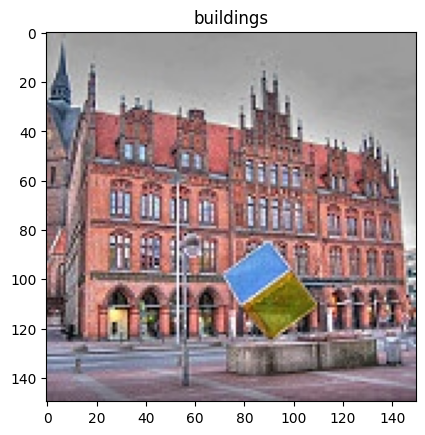

In [4]:
#Antes de dividir en train y test, se comprueba que los datos se hayan cargado sin fallos
print("Dimensión X_train {}".format(X_train.shape))
print("Dimensión Y_train {}".format(y_train.shape))
print("Dimensión X_test {}".format(X_test.shape))
print("Dimensión Y_test {}".format(y_test.shape))

plt.imshow(X_train[0])
plt.title(target_names[y_train[0]])
plt.show()

In [5]:
# Se unen los datos
X_t = np.concatenate((X_train, X_test))
y_t = np.concatenate((y_train, y_test))

# Se reorganizan los arrays
X_t, y_t = utils.shuffle(X_t, y_t)

# Los pasamos de nuevo a array ya que devuelve una lista
X_t = np.array(X_t)
y_t = np.array(y_t).reshape(len(y_t), 1)

print("Dimensionalidad de todas las imágenes {}".format(X_t.shape))
print("Dimensionalidad de target {}".format(y_t.shape))


Dimensionalidad de todas las imágenes (5911, 150, 150, 3)
Dimensionalidad de target (5911, 1)


In [6]:
# Se divide en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X_t, y_t,
    test_size=0.25,
    random_state=42,  # Para que la división sea reproducible
    stratify=y_t    # Mantiene la misma proporción de clases
)

print("Dimensión X_train {}".format(X_train.shape))
print("Dimensión Y_train {}".format(y_train.shape))
print("Dimensión X_test {}".format(X_test.shape))
print("Dimensión Y_test {}".format(y_test.shape))


Dimensión X_train (4433, 150, 150, 3)
Dimensión Y_train (4433, 1)
Dimensión X_test (1478, 150, 150, 3)
Dimensión Y_test (1478, 1)


In [7]:
# Normalizamos:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [8]:
# Como necesitamos liberar la RAM, se guardan los tensores
np.save('/content/drive/MyDrive/Colab Notebooks/X_train.npy', X_train)
np.save('/content/drive/MyDrive/Colab Notebooks/X_test.npy', X_test)
np.save('/content/drive/MyDrive/Colab Notebooks/y_train.npy', y_train)
np.save('/content/drive/MyDrive/Colab Notebooks/y_test.npy', y_test)